In [60]:
setwd(fs::path_abs("~/Local_Workspace/TesiMag"))
library(arrow, warn.conflicts = FALSE)
library(dplyr, warn.conflicts = FALSE)

source("src/paths/paths.R")
source("notebooks/integrazioni_regionali/nb_tools/pairing_procedure.R")
source("notebooks/integrazioni_regionali/nb_tools/state_avail.R")

In [9]:
liguria.data <- read_feather(file.path(path.ds, "ARPA", "LIGURIA", "dataset.arrow"))


In [10]:
liguria.data |>
    filter(valid) |>
    select(-valid) |>
    write_arpa_for_merge("ARPA Liguria")


In [18]:
s <- as.Date("2000-01-01")
e <- as.Date("2021-12-31")
liguria.data <- read_feather("db/pieces/ARPA Liguria.feather") |>
    select(variable, identifier = identifier.x, date, value) |>
    group_by(variable, identifier, date) |>
    summarise(value = mean(value, na.rm = TRUE), .groups = "drop") |>
    as_tsibble(key = c("variable", "identifier"), index = "date") |>
    filter(s <= date, date <= e) |>
    fill_gaps(.full = TRUE, .start = s, .end = e)


In [61]:
liguria.scia <- open_db_state_data("SCIA", "Liguria")
liguria.dpc <- open_db_state_data("BRUN", "Liguria")

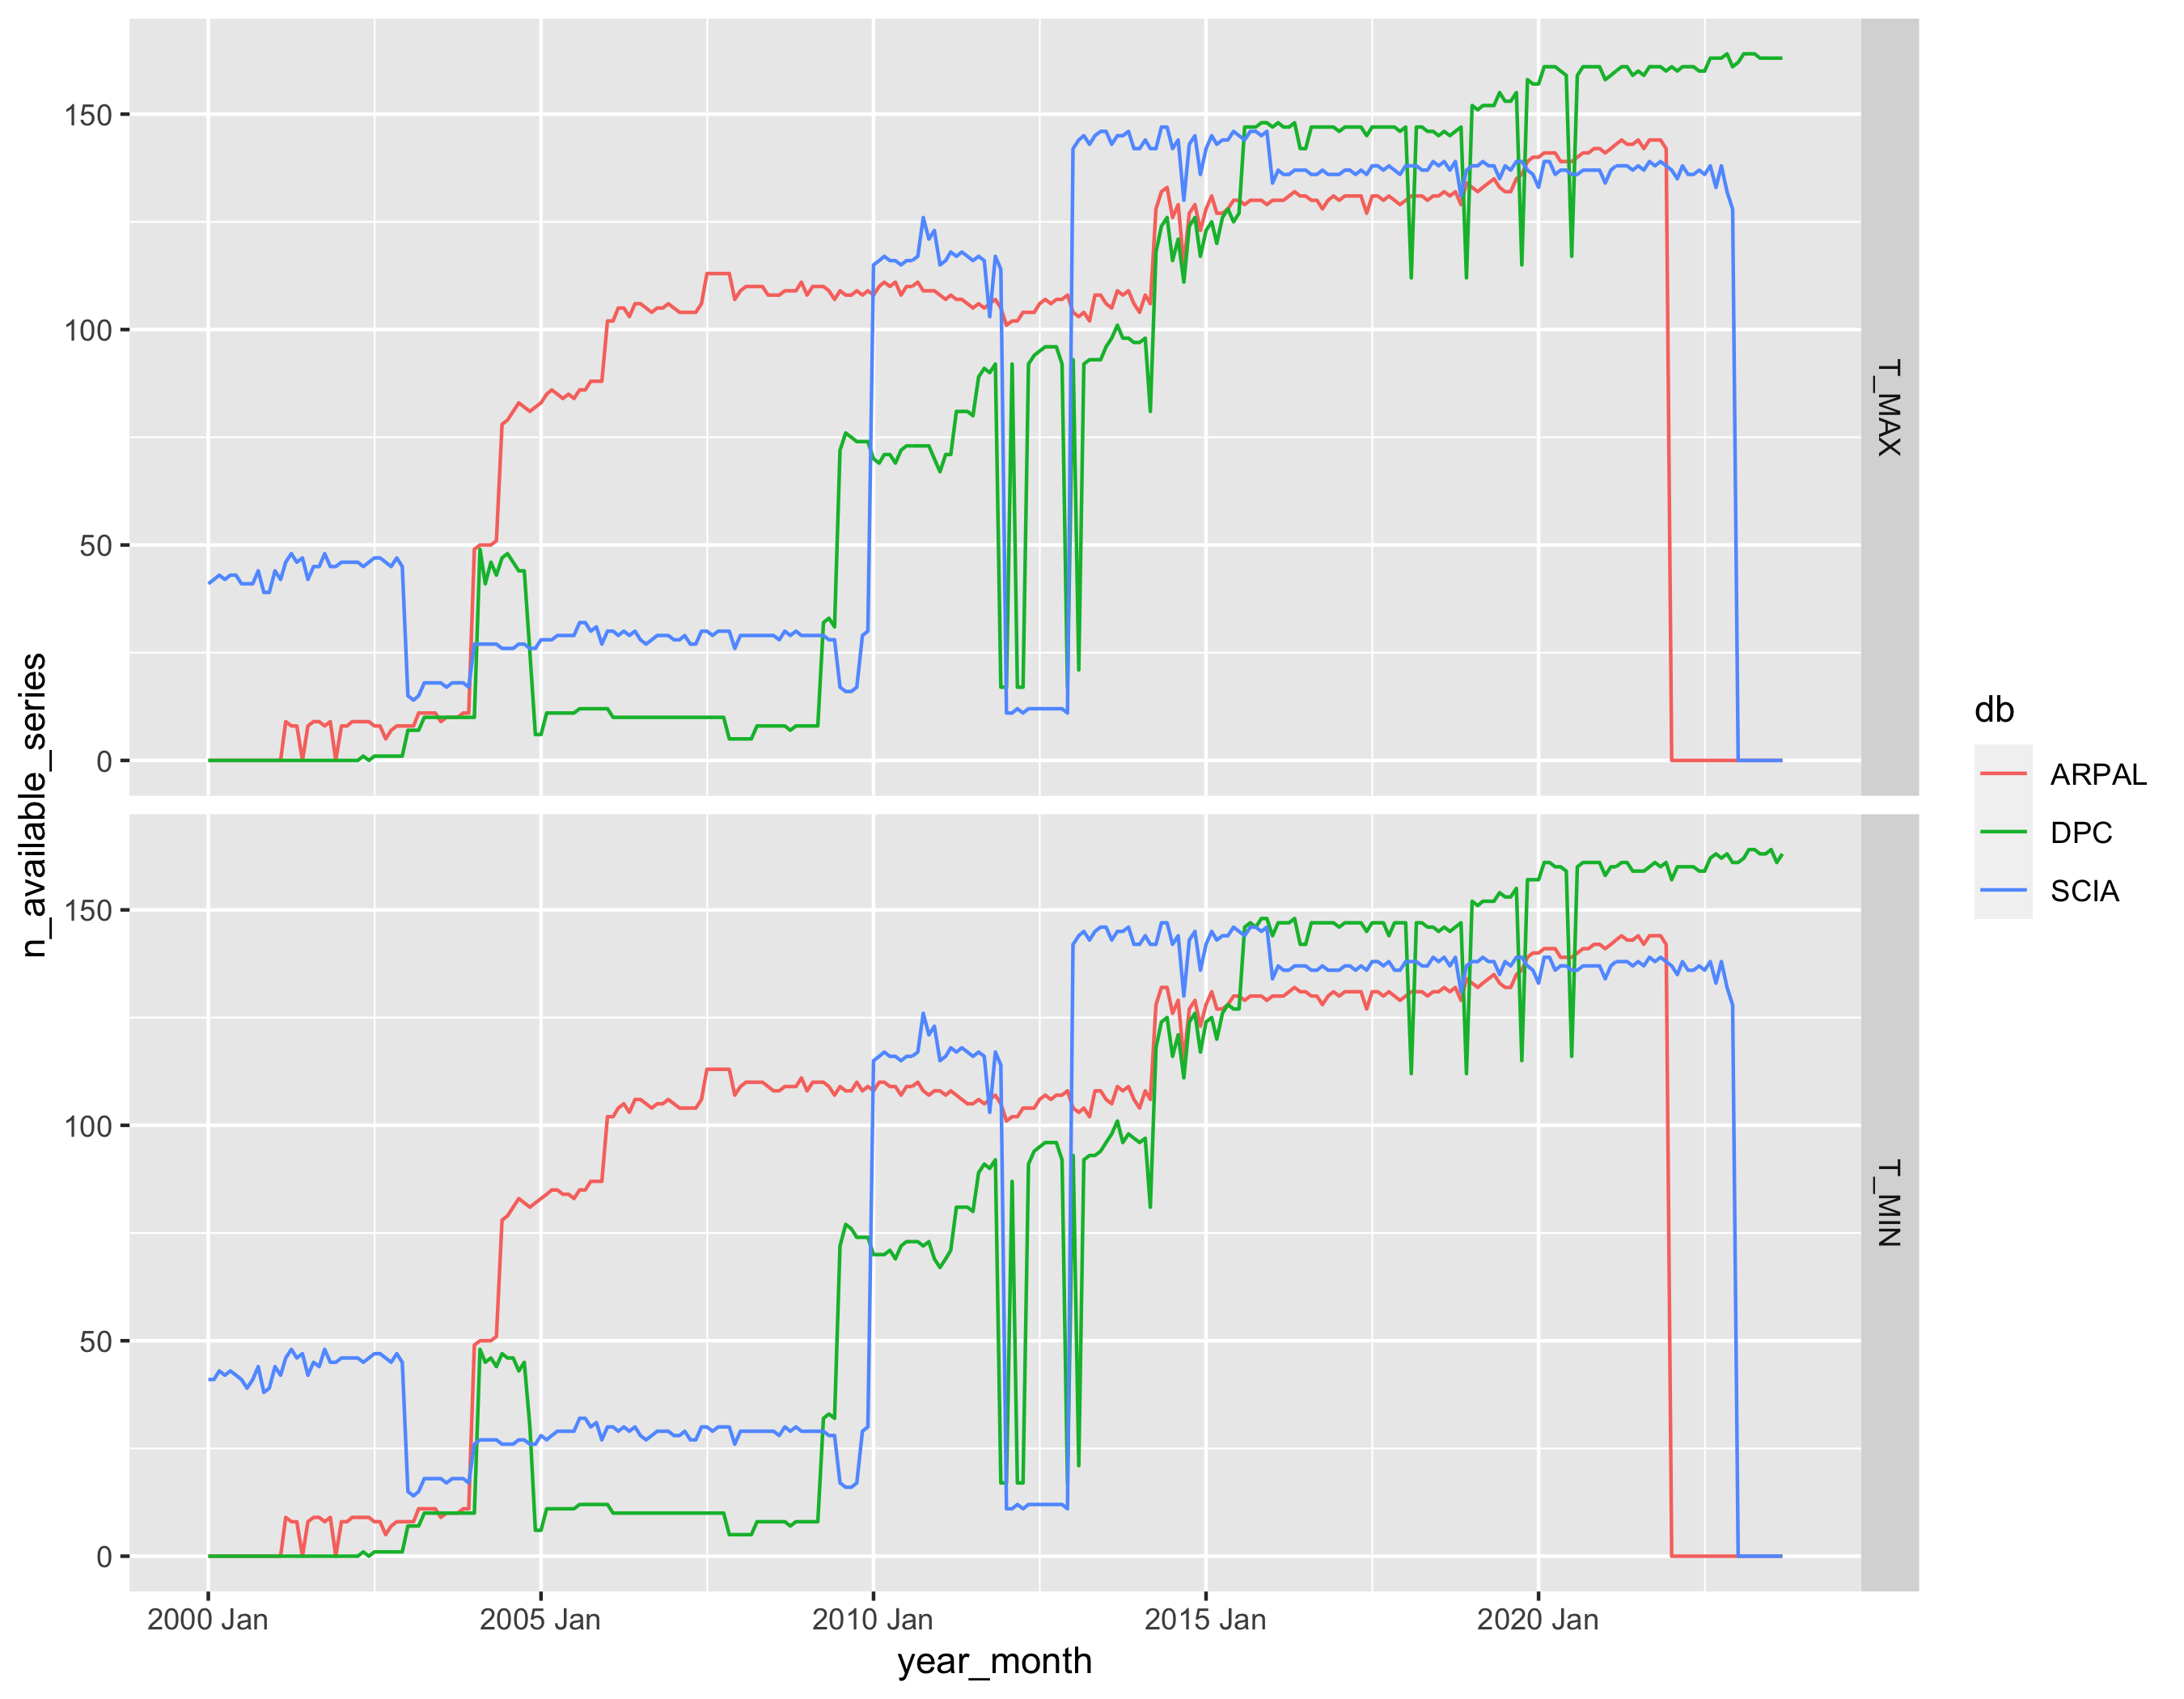

In [64]:
plot_state_avail(bind_rows(
    SCIA = liguria.scia,
    DPC = liguria.dpc,
    ARPAL = liguria.data,
    .id = "db"
))


In [24]:
liguria.scia

value,date,identifier,variable
<dbl>,<date>,<int>,<chr>
15.8,2022-12-08,5881,T_MAX
14.9,2022-12-09,5881,T_MAX
16.4,2022-12-10,5881,T_MAX
14.9,2022-12-11,5881,T_MAX
12.9,2022-12-12,5881,T_MAX
8.9,2022-12-13,5881,T_MAX
12.4,2022-12-14,5881,T_MAX
15.1,2022-12-15,5881,T_MAX
15.1,2022-12-16,5881,T_MAX
